In [8]:
'''
Batch Features
        Problem Statement:
        Scenario: We're a utility company providing energy to New York City.
        Goal: Every day, we want to accurately predict the energy demand for the next three days so that we can optimally plan our resources.
        Task: We will look at historic energy demand and create batch features that we can use to predict the future demand.
'''
import pandas as pd

csv_file_path = 'energy_data.csv'

# In case you want to pull this data live -> Go through the website eia.gov and register for API key
# import requests
# import os

# get the EIA API key form your secrets
# API_KEY = os.environ.get('EIA_API_KEY')

# API URL
# url = "https://api.eia.gov/v2/electricity/rto/region-sub-ba-data/data/?frequency=hourly&data[0]=value&facets[subba][]=ZONJ&start=2024-01-01T00&end=2024-03-30T23&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key="+API_KEY

# Make a GET request
# response = requests.get(url)
# data = response.json()  # Decode the JSON response into a dictionary

# Extract data from the response
# energy_data = data['response']['data']
# df = pd.DataFrame(energy_data)
# df.to_csv(csv_file_path, index=False)

# Load DataFrame from CSV
df = pd.read_csv(csv_file_path, parse_dates=['period']).set_index('period')

# Display the DataFrame
df.head()

,subba,subba-name,parent,parent-name,value,value-units
period,,,,,,
2024-03-30 23:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,4980,megawatthours
2024-03-30 22:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,4892,megawatthours
2024-03-30 21:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,4798,megawatthours
2024-03-30 20:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,4760,megawatthours
2024-03-30 19:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,4772,megawatthours


In [10]:
# Aggreggate by day:
df_daily = df.resample('D').sum("value")
df_daily

,value
period,
2024-01-01,116406
2024-01-02,128866
2024-01-03,131883
2024-01-04,131606
2024-01-05,136960
...,...
2024-03-26,125493
2024-03-27,125867
2024-03-28,125577


<Axes: xlabel='period'>

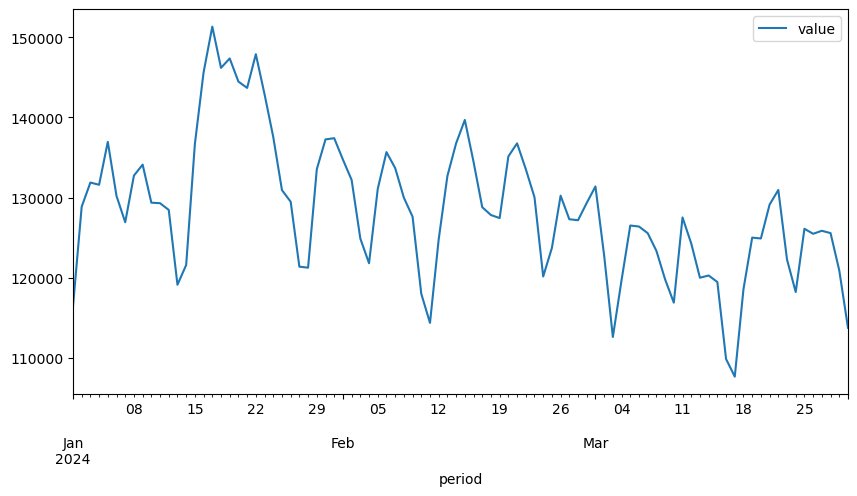

In [12]:
# Inspect time series
df_daily.plot(figsize=(10,5))

In [14]:
batch_df = pd.DataFrame()

# Lagging features
batch_df['lag_1'] = df_daily['value'].shift(1) # Energy demand -1 day

batch_df['lag_4'] = df_daily['value'].shift(4) # Energy demand +3 days - 7 days
batch_df['lag_5'] = df_daily['value'].shift(5) # Energy demand +2 days - 7 days
batch_df['lag_6'] = df_daily['value'].shift(6) # Energy demand +1 days - 7 days

batch_df['lag_11'] = df_daily['value'].shift(11) # Energy demand +3 days - 14 days
batch_df['lag_12'] = df_daily['value'].shift(12) # Energy demand +2 days - 14 days
batch_df['lag_13'] = df_daily['value'].shift(13) # Energy demand +1 days - 14 days

batch_df.head(14)

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13
period,,,,,,,
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02,116406.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-03,128866.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-04,131883.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-05,131606.0,116406.0,NaN,NaN,NaN,NaN,NaN
2024-01-06,136960.0,128866.0,116406.0,NaN,NaN,NaN,NaN
2024-01-07,130213.0,131883.0,128866.0,116406.0,NaN,NaN,NaN
2024-01-08,126933.0,131606.0,131883.0,128866.0,NaN,NaN,NaN
2024-01-09,132752.0,136960.0,131606.0,131883.0,NaN,NaN,NaN


In [16]:
# Rolling statistics
batch_df['rolling_mean_7'] = df_daily['value'].rolling(window=7).mean().round(2)
batch_df['rolling_std_7'] = df_daily['value'].rolling(window=7).std().round(2)

batch_df.head(7)

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7
period,,,,,,,,,
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02,116406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-03,128866.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-04,131883.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-05,131606.0,116406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-06,136960.0,128866.0,116406.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-07,130213.0,131883.0,128866.0,116406.0,NaN,NaN,NaN,128981.0,6361.77


In [18]:
# Inspect target variable - it's actually 3!

# Lagging target variable
batch_df['target_1d'] = df_daily['value'].shift(-1) # Next day
batch_df['target_2d'] = df_daily['value'].shift(-2) # Second-next day
batch_df['target_3d'] = df_daily['value'].shift(-3) # Third-next day

batch_df.head(15)

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7,target_1d,target_2d,target_3d
period,,,,,,,,,,,,
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128866.0,131883.0,131606.0
2024-01-02,116406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131883.0,131606.0,136960.0
2024-01-03,128866.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131606.0,136960.0,130213.0
2024-01-04,131883.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136960.0,130213.0,126933.0
2024-01-05,131606.0,116406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130213.0,126933.0,132752.0
2024-01-06,136960.0,128866.0,116406.0,NaN,NaN,NaN,NaN,NaN,NaN,126933.0,132752.0,134119.0
2024-01-07,130213.0,131883.0,128866.0,116406.0,NaN,NaN,NaN,128981.00,6361.77,132752.0,134119.0,129372.0
2024-01-08,126933.0,131606.0,131883.0,128866.0,NaN,NaN,NaN,131316.14,3182.04,134119.0,129372.0,129308.0
2024-01-09,132752.0,136960.0,131606.0,131883.0,NaN,NaN,NaN,132066.57,3126.85,129372.0,129308.0,128467.0


In [20]:
# check targets
df_daily.head(4)

,value
period,
2024-01-01,116406
2024-01-02,128866
2024-01-03,131883
2024-01-04,131606


In [22]:
# Drop NaN-values
batch_df = batch_df.dropna()
batch_df

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7,target_1d,target_2d,target_3d
period,,,,,,,,,,,,
2024-01-14,119134.0,129372.0,134119.0,132752.0,131883.0,128866.0,116406.0,127822.29,5524.62,136704.0,145628.0,151329.0
2024-01-15,121604.0,129308.0,129372.0,134119.0,131606.0,131883.0,128866.0,128386.86,6264.72,145628.0,151329.0,146188.0
2024-01-16,136704.0,128467.0,129308.0,129372.0,136960.0,131606.0,131883.0,130031.00,8953.19,151329.0,146188.0,147359.0
2024-01-17,145628.0,119134.0,128467.0,129308.0,130213.0,136960.0,131606.0,133167.71,12008.71,146188.0,147359.0,144471.0
2024-01-18,151329.0,121604.0,119134.0,128467.0,126933.0,130213.0,136960.0,135579.14,12774.85,147359.0,144471.0,143686.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-23,130956.0,125016.0,118592.0,107680.0,124289.0,127532.0,116906.0,122652.71,7772.78,118230.0,126118.0,125493.0
2024-03-24,122277.0,124910.0,125016.0,118592.0,120013.0,124289.0,127532.0,124159.86,4864.40,126118.0,125493.0,125867.0
2024-03-25,118230.0,129138.0,124910.0,125016.0,120293.0,120013.0,124289.0,125235.00,4217.35,125493.0,125867.0,125577.0


In [24]:
# Check correlation matrix. 
# Ideally we want low correlation between features, but high correlation between features and target

corr = batch_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7,target_1d,target_2d,target_3d
lag_1,1.000000,0.302505,0.201622,0.197652,0.041389,0.036201,0.150800,0.735396,0.252377,0.491790,0.314900,0.231609
lag_4,0.302505,1.000000,0.792653,0.489499,0.389185,0.266067,0.082215,0.791467,-0.091057,0.214432,0.320147,0.414412
lag_5,0.201622,0.792653,1.000000,0.798547,0.287637,0.379447,0.238787,0.732367,-0.167635,0.318708,0.410565,0.302758
lag_6,0.197652,0.489499,0.798547,1.000000,0.199292,0.304989,0.370801,0.639983,-0.127266,0.417532,0.315702,0.148122
lag_11,0.041389,0.389185,0.287637,0.199292,1.000000,0.775969,0.440276,0.263935,0.363765,0.139937,0.362888,0.539971
lag_12,0.036201,0.266067,0.379447,0.304989,0.775969,1.000000,0.761331,0.243296,0.270173,0.346903,0.500124,0.395421
lag_13,0.150800,0.082215,0.238787,0.370801,0.440276,0.761331,1.000000,0.242832,0.117338,0.461421,0.318695,0.117222
rolling_mean_7,0.735396,0.791467,0.732367,0.639983,0.263935,0.243296,0.242832,1.000000,0.077361,0.538036,0.450516,0.393690
rolling_std_7,0.252377,-0.091057,-0.167635,-0.127266,0.363765,0.270173,0.117338,0.077361,1.000000,0.394654,0.504233,0.582894
target_1d,0.491790,0.214432,0.318708,0.417532,0.139937,0.346903,0.461421,0.538036,0.394654,1.000000,0.813661,0.546289


In [31]:
# pulling everything together

# Load DataFrame from CSV
df = pd.read_csv(csv_file_path, parse_dates=['period'])
df.set_index('period', inplace=True)

# Run the feature pipeline
import feature_processing
feature_processing.feature_pipeline(df)

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7
period,,,,,,,,,
2024-01-14,119134.0,129372.0,134119.0,132752.0,131883.0,128866.0,116406.0,127822.29,5524.62
2024-01-15,121604.0,129308.0,129372.0,134119.0,131606.0,131883.0,128866.0,128386.86,6264.72
2024-01-16,136704.0,128467.0,129308.0,129372.0,136960.0,131606.0,131883.0,130031.00,8953.19
2024-01-17,145628.0,119134.0,128467.0,129308.0,130213.0,136960.0,131606.0,133167.71,12008.71
2024-01-18,151329.0,121604.0,119134.0,128467.0,126933.0,130213.0,136960.0,135579.14,12774.85
...,...,...,...,...,...,...,...,...,...
2024-03-26,126118.0,130956.0,129138.0,124910.0,119478.0,120293.0,120013.0,125303.14,4217.08
2024-03-27,125493.0,122277.0,130956.0,129138.0,109879.0,119478.0,120293.0,125439.86,4217.72
2024-03-28,125867.0,118230.0,122277.0,130956.0,107680.0,109879.0,119478.0,124931.14,3900.13


In [33]:
# Calculate targets
feature_processing.get_targets(df)

,target_1d,target_2d,target_3d
period,,,
2024-01-01,128866.0,131883.0,131606.0
2024-01-02,131883.0,131606.0,136960.0
2024-01-03,131606.0,136960.0,130213.0
2024-01-04,136960.0,130213.0,126933.0
2024-01-05,130213.0,126933.0,132752.0
...,...,...,...
2024-03-23,118230.0,126118.0,125493.0
2024-03-24,126118.0,125493.0,125867.0
2024-03-25,125493.0,125867.0,125577.0


In [35]:
import os
import yaml
import pandas as pd 

# Setting up our feature store

# Directory for feature store
directory = "feature_store"
if not os.path.exists(directory):
    os.makedirs(directory)

# Feature definitions
id = "v1"
config_data = {
    'feature_store': {
        'id': f"{id}",
        'latest_feature': "1999-01-01",
        'latest_target': "1999-01-01",
        'feature_offset': "13",
        'target_offset': "3",
        'features_path': f"feature_store/features_{id}.csv",
        'targets_path': f"feature_store/targets_{id}.csv",
        'schema': {
            'features': [
                {'name': 'lag_1', 'type': 'float'},
                {'name': 'lag_4', 'type': 'float'},
                {'name': 'lag_5', 'type': 'float'},
                {'name': 'lag_6', 'type': 'float'},
                {'name': 'lag_11', 'type': 'float'},
                {'name': 'lag_12', 'type': 'float'},
                {'name': 'lag_13', 'type': 'float'},
                {'name': 'rolling_mean_7', 'type': 'float'},
                {'name': 'rolling_std_7', 'type': 'float'}
            ],
            'targets': [
                {'name': 'target_1d', 'type': 'float'},
                {'name': 'target_2d', 'type': 'float'},
                {'name': 'target_3d', 'type': 'float'}
            ]
        }
    }
}

# Path to the YAML configuration file
yaml_file_path = os.path.join(directory, f"config_{id}.yaml")

# Write the configuration data to a YAML file
with open(yaml_file_path, 'w') as file:
    yaml.dump(config_data, file, default_flow_style=False)

In [51]:
import feature_processing

# Load the file
csv_file_path = 'energy_data.csv'
df = pd.read_csv(csv_file_path, parse_dates=['period'])
df.set_index('period', inplace=True)

# Run the feature pipeline
batch_df = feature_processing.feature_pipeline(df)
batch_df

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7
period,,,,,,,,,
2024-01-14,119134.0,129372.0,134119.0,132752.0,131883.0,128866.0,116406.0,127822.29,5524.62
2024-01-15,121604.0,129308.0,129372.0,134119.0,131606.0,131883.0,128866.0,128386.86,6264.72
2024-01-16,136704.0,128467.0,129308.0,129372.0,136960.0,131606.0,131883.0,130031.00,8953.19
2024-01-17,145628.0,119134.0,128467.0,129308.0,130213.0,136960.0,131606.0,133167.71,12008.71
2024-01-18,151329.0,121604.0,119134.0,128467.0,126933.0,130213.0,136960.0,135579.14,12774.85
...,...,...,...,...,...,...,...,...,...
2024-03-26,126118.0,130956.0,129138.0,124910.0,119478.0,120293.0,120013.0,125303.14,4217.08
2024-03-27,125493.0,122277.0,130956.0,129138.0,109879.0,119478.0,120293.0,125439.86,4217.72
2024-03-28,125867.0,118230.0,122277.0,130956.0,107680.0,109879.0,119478.0,124931.14,3900.13


In [63]:
from feature_store_utils import update_feature_store  # ✅ updated filename
# Update the feature store
yaml_file_path = 'feature_store/config_v1.yaml'
update_feature_store(batch_df, yaml_file_path)

Feature store updated with last date 2024-03-30 00:00:00


In [73]:
import importlib

# Reload in case the file was edited
importlib.reload(feature_store_utils)

# File path
yaml_file_path = 'feature_store/config_v1.yaml'

# Fetch data from the store starting from a specific date
filtered_df = feature_store_utils.fetch_data_from_store('2024-03-23', yaml_file_path)
filtered_df.head()

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7
period,,,,,,,,,
2024-03-23,130956.0,125016.0,118592.0,107680.0,124289.0,127532.0,116906.0,122652.71,7772.78
2024-03-24,122277.0,124910.0,125016.0,118592.0,120013.0,124289.0,127532.0,124159.86,4864.40
2024-03-25,118230.0,129138.0,124910.0,125016.0,120293.0,120013.0,124289.0,125235.00,4217.35
2024-03-26,126118.0,130956.0,129138.0,124910.0,119478.0,120293.0,120013.0,125303.14,4217.08
2024-03-27,125493.0,122277.0,130956.0,129138.0,109879.0,119478.0,120293.0,125439.86,4217.72


In [77]:
# Simulate new data coming in
# This regenerates the entire feature store
# In practice: re-calculate only the delta

csv_file_path = 'energy_data_new.csv'
df = pd.read_csv(csv_file_path, parse_dates=['period']).set_index('period')

batch_df = feature_processing.feature_pipeline(df)
feature_store_utils.update_feature_store(batch_df, yaml_file_path)

Feature store updated with last date 2024-04-07 00:00:00


In [81]:
feature_store_utils.fetch_data_from_store('2024-04-5', yaml_file_path)

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7
period,,,,,,,,,
2024-04-05,127645.0,119066.0,107790.0,113774.0,126118.0,118230.0,122277.0,120849.57,7744.82
2024-04-06,124704.0,124079.0,119066.0,107790.0,125493.0,126118.0,118230.0,121119.57,7485.65
2024-04-07,115664.0,128889.0,124079.0,119066.0,125867.0,125493.0,126118.0,121511.29,6702.67


In [90]:
# Training our model to predict

import yaml
import pandas as pd
import feature_store_utils  # ✅ correct import

# YAML path
yaml_file_path = 'feature_store/config_v1.yaml'

# Load YAML config
with open(yaml_file_path, 'r') as file:
    config = yaml.safe_load(file)

# Get Features
X_train = feature_store_utils.fetch_data_from_store(yaml_file_path=yaml_file_path)
X_train = X_train.head(-7)  # keep last 7 rows for later testing
X_train

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7
period,,,,,,,,,
2024-01-14,119134.0,129372.0,134119.0,132752.0,131883.0,128866.0,116406.0,127822.29,5524.62
2024-01-15,121604.0,129308.0,129372.0,134119.0,131606.0,131883.0,128866.0,128386.86,6264.72
2024-01-16,136704.0,128467.0,129308.0,129372.0,136960.0,131606.0,131883.0,130031.00,8953.19
2024-01-17,145628.0,119134.0,128467.0,129308.0,130213.0,136960.0,131606.0,133167.71,12008.71
2024-01-18,151329.0,121604.0,119134.0,128467.0,126933.0,130213.0,136960.0,135579.14,12774.85
...,...,...,...,...,...,...,...,...,...
2024-03-27,125493.0,122277.0,130956.0,129138.0,109879.0,119478.0,120293.0,125439.86,4217.72
2024-03-28,125867.0,118230.0,122277.0,130956.0,107680.0,109879.0,119478.0,124931.14,3900.13
2024-03-29,125577.0,126118.0,118230.0,122277.0,118592.0,107680.0,109879.0,123498.29,3072.37


In [96]:
# Get targets
import feature_processing

csv_file_path = 'energy_data_new.csv'
df = pd.read_csv(csv_file_path, parse_dates=['period'])
df.set_index('period', inplace=True)

targets_df = feature_processing.get_targets(df)
targets_df

,target_1d,target_2d,target_3d
period,,,
2024-01-01,128866.0,131883.0,131606.0
2024-01-02,131883.0,131606.0,136960.0
2024-01-03,131606.0,136960.0,130213.0
2024-01-04,136960.0,130213.0,126933.0
2024-01-05,130213.0,126933.0,132752.0
...,...,...,...
2024-03-31,119066.0,124079.0,128889.0
2024-04-01,124079.0,128889.0,127645.0
2024-04-02,128889.0,127645.0,124704.0


In [104]:
import importlib
import feature_store_utils
importlib.reload(feature_store_utils)

feature_store_utils.update_feature_store(targets_df, yaml_file_path, targets=True)

'Targets updated in feature store with last date 2024-04-04 00:00:00'

In [116]:
import importlib
import feature_store_utils

importlib.reload(feature_store_utils)

feature_store_utils.fetch_data_from_store(X_train.index.min(), yaml_file_path, targets=True)

,target_1d,target_2d,target_3d
period,,,
2024-01-14,136704.0,145628.0,151329.0
2024-01-15,145628.0,151329.0,146188.0
2024-01-16,151329.0,146188.0,147359.0
2024-01-17,146188.0,147359.0,144471.0
2024-01-18,147359.0,144471.0,143686.0
...,...,...,...
2024-03-31,119066.0,124079.0,128889.0
2024-04-01,124079.0,128889.0,127645.0
2024-04-02,128889.0,127645.0,124704.0


In [122]:
# Same date range for targes and features
Y_train = feature_store_utils.fetch_data_from_store(
    period=X_train.index.min(), 
    yaml_file_path=yaml_file_path, 
    targets=True
).loc[:X_train.index.max()]
Y_train

,target_1d,target_2d,target_3d
period,,,
2024-01-14,136704.0,145628.0,151329.0
2024-01-15,145628.0,151329.0,146188.0
2024-01-16,151329.0,146188.0,147359.0
2024-01-17,146188.0,147359.0,144471.0
2024-01-18,147359.0,144471.0,143686.0
...,...,...,...
2024-03-27,125577.0,120926.0,113774.0
2024-03-28,120926.0,113774.0,107790.0
2024-03-29,113774.0,107790.0,119066.0


In [124]:
# turn into a list
y_train_ls= []
for target in Y_train.columns:
  y_train_ls.append(Y_train[target])

y_train_ls

[period
 2024-01-14    136704.0
 2024-01-15    145628.0
 2024-01-16    151329.0
 2024-01-17    146188.0
 2024-01-18    147359.0
                 ...   
 2024-03-27    125577.0
 2024-03-28    120926.0
 2024-03-29    113774.0
 2024-03-30    107790.0
 2024-03-31    119066.0
 Name: target_1d, Length: 78, dtype: float64,
 period
 2024-01-14    145628.0
 2024-01-15    151329.0
 2024-01-16    146188.0
 2024-01-17    147359.0
 2024-01-18    144471.0
                 ...   
 2024-03-27    120926.0
 2024-03-28    113774.0
 2024-03-29    107790.0
 2024-03-30    119066.0
 2024-03-31    124079.0
 Name: target_2d, Length: 78, dtype: float64,
 period
 2024-01-14    151329.0
 2024-01-15    146188.0
 2024-01-16    147359.0
 2024-01-17    144471.0
 2024-01-18    143686.0
                 ...   
 2024-03-27    113774.0
 2024-03-28    107790.0
 2024-03-29    119066.0
 2024-03-30    124079.0
 2024-03-31    128889.0
 Name: target_3d, Length: 78, dtype: float64]

In [126]:
import xgboost as xgb

# Loop through targets - train one model for each target variable
cv_results_ls = []
for y_train in y_train_ls:

  # Prepare the DMatrix which is required by XGBoost
  dtrain = xgb.DMatrix(data=X_train, label=y_train)

  # Define XGBoost parameters
  params = {
    #'max_depth': 6,
    #'min_child_weight': 1,
    #'eta': 0.5,
    #'subsample': 1,
    #'colsample_bytree': 1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
  }

  # Perform cross-validation
  cv_results = xgb.cv(
      params=params,
      dtrain=dtrain,
      num_boost_round=100,
      nfold = 4,
      early_stopping_rounds=10,
      metrics='rmse',
      as_pandas=True,
      seed=123
  )
  cv_results_ls.append(cv_results)
  # Show the last mean RMSE as a measure of final performance
  print(f"Last mean RMSE: {cv_results['test-rmse-mean'][-1:]}")

Last mean RMSE: 99    7477.635081
Name: test-rmse-mean, dtype: float64
Last mean RMSE: 73    7771.95831
Name: test-rmse-mean, dtype: float64
Last mean RMSE: 77    6680.986696
Name: test-rmse-mean, dtype: float64


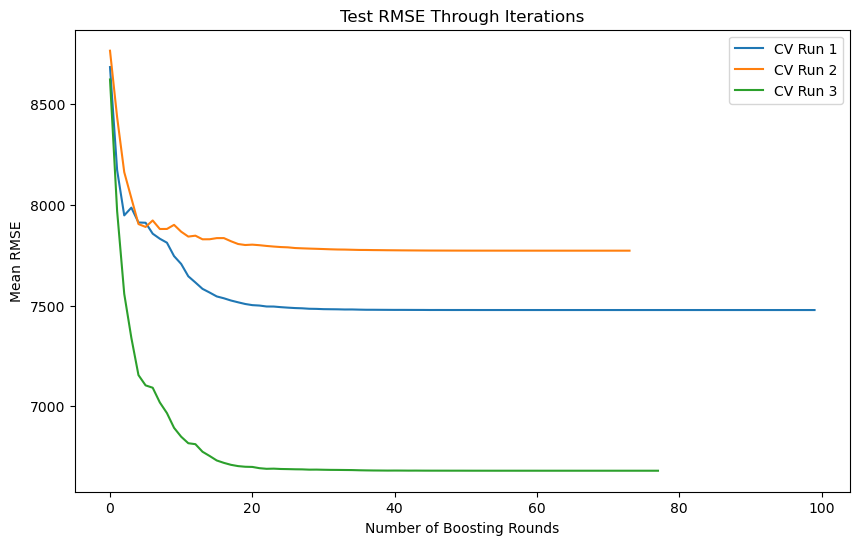

In [128]:
import matplotlib.pyplot as plt

# Plot RMSE through iterations with different colors for each line

plt.figure(figsize=(10, 6))

for idx, cv_results in enumerate(cv_results_ls):
    plt.plot(cv_results['test-rmse-mean'], label=f'CV Run {idx+1}')

plt.title('Test RMSE Through Iterations')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('Mean RMSE')
plt.legend()
plt.show()

In [130]:
# List to store the final models
final_models_ls = []

# Use the same params here you used in cross-validation
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
  }

# Iterate through each set of cross-validation results and corresponding training targets
for cv_results, y_train in zip(cv_results_ls, y_train_ls):
    # Determine the optimal number of boosting rounds from cross-validation results
    optimal_boost_rounds = cv_results['test-rmse-mean'].idxmin() + 1

    # Initialize the XGBoost regressor with determined parameters
    final_model = xgb.XGBRegressor(
        n_estimators=optimal_boost_rounds,
        **params
    )

    # Train the model on the full training dataset
    final_model.fit(X_train, y_train)

    # Append the trained model to the list
    final_models_ls.append(final_model)

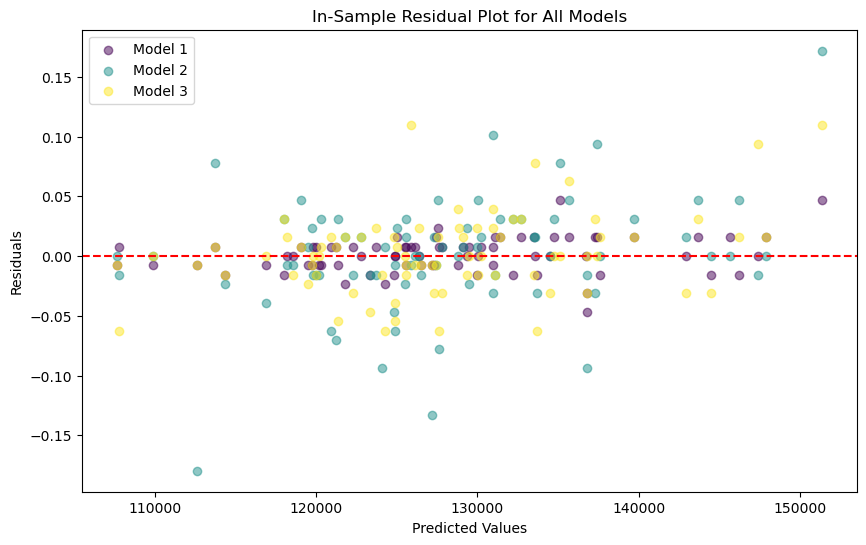

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Generate residual plot

# Initialize lists to hold all predicted values and residuals
all_y_pred = []
all_residuals = []

# Generate a list of colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(final_models_ls)))

# Plot residuals for each model
plt.figure(figsize=(10, 6))

for idx, (final_model, y_train) in enumerate(zip(final_models_ls, y_train_ls)):
    # Make predictions
    y_pred = final_model.predict(X_train)

    # Calculate residuals
    residuals = y_train - y_pred

    # Plot residuals with a unique color for each model
    plt.scatter(y_pred, residuals, color=colors[idx], alpha=0.5, label=f'Model {idx+1}')

# Add plot title and labels
plt.axhline(y=0, color='red', linestyle='--')
plt.title('In-Sample Residual Plot for All Models')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()  # Add a legend to differentiate each model
plt.show()

In [138]:
import pandas as pd
import xgboost
import os
import joblib
import feature_store_utils
import feature_processing

In [140]:
# Path to the YAML configuration file
yaml_file_path = ('feature_store/config_v1.yaml')

In [144]:
# Fetch data from feature store given a certain criteria
import feature_store_utils

features_df = feature_store_utils.fetch_data_from_store("2024-03-23", yaml_file_path)
features_df

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7
period,,,,,,,,,
2024-03-23,130956.0,125016.0,118592.0,107680.0,124289.0,127532.0,116906.0,122652.71,7772.78
2024-03-24,122277.0,124910.0,125016.0,118592.0,120013.0,124289.0,127532.0,124159.86,4864.40
2024-03-25,118230.0,129138.0,124910.0,125016.0,120293.0,120013.0,124289.0,125235.00,4217.35
2024-03-26,126118.0,130956.0,129138.0,124910.0,119478.0,120293.0,120013.0,125303.14,4217.08
2024-03-27,125493.0,122277.0,130956.0,129138.0,109879.0,119478.0,120293.0,125439.86,4217.72
2024-03-28,125867.0,118230.0,122277.0,130956.0,107680.0,109879.0,119478.0,124931.14,3900.13
2024-03-29,125577.0,126118.0,118230.0,122277.0,118592.0,107680.0,109879.0,123498.29,3072.37
2024-03-30,120926.0,125493.0,126118.0,118230.0,125016.0,118592.0,107680.0,122283.57,4819.72
2024-03-31,113774.0,125867.0,125493.0,126118.0,124910.0,125016.0,118592.0,120792.14,7273.69


In [166]:
from xgboost import XGBRegressor
import joblib
import os

# Tạo thư mục models nếu chưa có
os.makedirs('models', exist_ok=True)

# Đồng bộ dữ liệu theo index và loại bỏ 7 ngày cuối
shared_index = features_df.index.intersection(targets_df.index)
X_train = features_df.loc[shared_index].head(-7)
Y_train = targets_df.loc[shared_index].head(-7)

# Train và lưu 3 mô hình
for i, target_col in enumerate(['target_1d', 'target_2d', 'target_3d']):
    model = XGBRegressor()
    model.fit(X_train, Y_train[target_col])  # ✅ label khớp index
    joblib.dump(model, f'models/batch_demand_forecaster_model_{i+1}.pkl')

In [168]:
predictions_ls = [] # list to store predictions

# Load each model from its respective file
for idx in range(1, 4):  # Assuming there are 3 models
    filename = f'models/batch_demand_forecaster_model_{idx}.pkl'
    model = joblib.load(filename)
    prediction = model.predict(features_df)
    predictions_ls.append(prediction)

predictions_ls

[array([118230.02 , 126117.98 , 125492.99 , 125866.99 , 125576.99 ,
        120926.01 , 120926.01 , 126017.836, 125492.99 , 125492.99 ,
        125476.93 , 120926.01 , 118230.02 , 118230.02 , 120926.01 ,
        120926.01 ], dtype=float32),
 array([126117.98 , 125492.99 , 125866.99 , 125576.99 , 120926.01 ,
        113774.02 , 125887.3  , 125591.766, 125591.766, 125591.766,
        120925.99 , 120925.99 , 113774.02 , 113774.02 , 120926.01 ,
        125866.99 ], dtype=float32),
 array([125492.99, 125866.98, 125576.99, 120925.99, 113774.01, 107790.02,
        125488.63, 125577.01, 125577.01, 125577.01, 113773.97, 113773.97,
        107790.02, 107790.02, 113774.01, 125577.01], dtype=float32)]

In [174]:
import feature_store_utils
targets_df = feature_store_utils.fetch_data_from_store("2024-03-23", yaml_file_path, targets=True)
targets_df

,target_1d,target_2d,target_3d
period,,,
2024-03-23,118230.0,126118.0,125493.0
2024-03-24,126118.0,125493.0,125867.0
2024-03-25,125493.0,125867.0,125577.0
2024-03-26,125867.0,125577.0,120926.0
2024-03-27,125577.0,120926.0,113774.0
2024-03-28,120926.0,113774.0,107790.0
2024-03-29,113774.0,107790.0,119066.0
2024-03-30,107790.0,119066.0,124079.0
2024-03-31,119066.0,124079.0,128889.0


In [176]:
predictions_df = pd.DataFrame({f'predicted_{i+1}d': predictions_ls[i] for i in range(len(predictions_ls))})
predictions_df.index = features_df.index
result_df = predictions_df.join(targets_df, how = "inner")
result_df

,predicted_1d,predicted_2d,predicted_3d,target_1d,target_2d,target_3d
period,,,,,,
2024-03-23,118230.023438,126117.976562,125492.992188,118230.0,126118.0,125493.0
2024-03-24,126117.976562,125492.992188,125866.976562,126118.0,125493.0,125867.0
2024-03-25,125492.992188,125866.992188,125576.992188,125493.0,125867.0,125577.0
2024-03-26,125866.992188,125576.992188,120925.992188,125867.0,125577.0,120926.0
2024-03-27,125576.992188,120926.007812,113774.007812,125577.0,120926.0,113774.0
2024-03-28,120926.007812,113774.023438,107790.023438,120926.0,113774.0,107790.0
2024-03-29,120926.007812,125887.296875,125488.632812,113774.0,107790.0,119066.0
2024-03-30,126017.835938,125591.765625,125577.007812,107790.0,119066.0,124079.0
2024-03-31,125492.992188,125591.765625,125577.007812,119066.0,124079.0,128889.0


/var/folders/dh/vh_kvsnj41q6877kxnwy1c040000gn/T/ipykernel_58719/1445833506.py:30: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


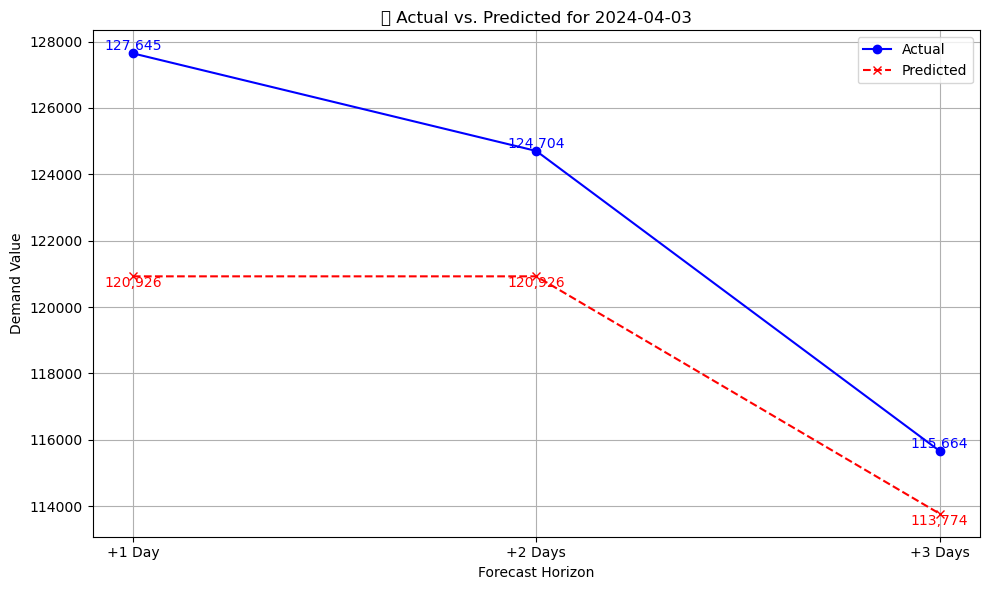

In [184]:
import matplotlib.pyplot as plt

def plot_forecast(data, date):
    if date not in data.index:
        print(f"⚠️ Date {date} not found in data index.")
        return
    
    daily_data = data.loc[date]

    actuals = [daily_data['target_1d'], daily_data['target_2d'], daily_data['target_3d']]
    predictions = [daily_data['predicted_1d'], daily_data['predicted_2d'], daily_data['predicted_3d']]
    days = ['+1 Day', '+2 Days', '+3 Days']

    plt.figure(figsize=(10, 6))

    # Plot lines
    plt.plot(days, actuals, label='Actual', marker='o', linestyle='-', color='blue')
    plt.plot(days, predictions, label='Predicted', marker='x', linestyle='--', color='red')

    # Add value labels
    for i in range(3):
        plt.text(i, actuals[i], f"{actuals[i]:,.0f}", color='blue', ha='center', va='bottom')
        plt.text(i, predictions[i], f"{predictions[i]:,.0f}", color='red', ha='center', va='top')

    plt.title(f'📈 Actual vs. Predicted for {date}')
    plt.xlabel('Forecast Horizon')
    plt.ylabel('Demand Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_forecast(result_df, '2024-04-03')

/var/folders/dh/vh_kvsnj41q6877kxnwy1c040000gn/T/ipykernel_58719/1445833506.py:30: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


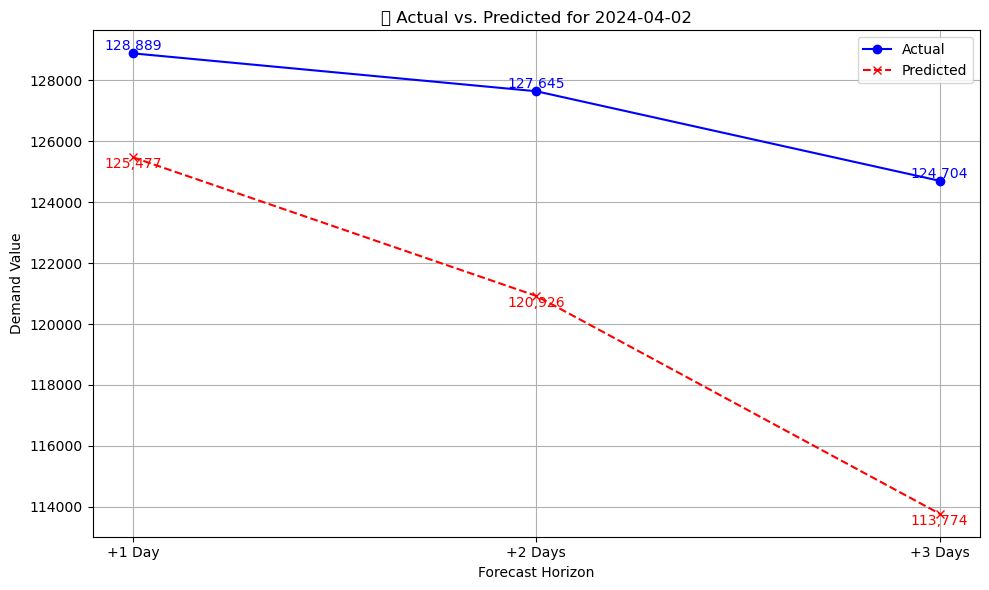

In [186]:
plot_forecast(result_df, '2024-04-02')

In [192]:
## END OF PART 1: BATCH SYSTEMS
## BEGIN PART 2: NEAR REAL-TIME SYSTEMS
# 🔤 Definition: Near Real-Time Systems are systems that process and respond to new data almost immediately after it becomes available — usually with a delay of a few seconds to a few minutes.
# 🧠 In plain words: Instead of waiting to process a big chunk of data all at once like in batch systems, near real-time systems respond 
# Ecommerce: Dynamic pricing optimization
# Logistics: Demand forecasting and inventory management
# Finance: Risk scoring and compliance

import pandas as pd
csv_file_path = 'energy_data_new.csv'
df = (pd.read_csv(csv_file_path, parse_dates=['period'])
      .set_index('period')
      .sort_index(ascending=False))
df = df.tail(-81)
df

,subba,subba-name,parent,parent-name,value,value-units
period,,,,,,
2024-04-04 14:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,5752,megawatthours
2024-04-04 13:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,5630,megawatthours
2024-04-04 12:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,5420,megawatthours
2024-04-04 11:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,4989,megawatthours
2024-04-04 10:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,4567,megawatthours
...,...,...,...,...,...,...
2024-01-01 04:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,4956,megawatthours
2024-01-01 03:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,5112,megawatthours
2024-01-01 02:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,5257,megawatthours


In [194]:
import yaml
import os
directory = "feature_store"
yaml_file_path = os.path.join(directory, 'config_v1.yaml')
with open(yaml_file_path, 'r') as file:
    config = yaml.safe_load(file)

max_offset_days = int(config['feature_store']['feature_offset'])

print(max_offset_days)

13


In [196]:
max_offset_hours = (max_offset_days + 1) * 24 # +1 because we need the current day + the offset
max_offset_hours

336

In [198]:
# Get one mini-batch of data
mini_batch_df = df[:max_offset_hours]
mini_batch_df

,subba,subba-name,parent,parent-name,value,value-units
period,,,,,,
2024-04-04 14:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,5752,megawatthours
2024-04-04 13:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,5630,megawatthours
2024-04-04 12:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,5420,megawatthours
2024-04-04 11:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,4989,megawatthours
2024-04-04 10:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,4567,megawatthours
...,...,...,...,...,...,...
2024-03-21 19:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,5767,megawatthours
2024-03-21 18:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,5816,megawatthours
2024-03-21 17:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,5852,megawatthours


In [202]:
chunk_size = 24
periods = mini_batch_df.index[::chunk_size]  # Select every chunk_size-th index as the period
sums = [mini_batch_df.iloc[i:i + chunk_size]['value'].sum() for i in range(0, len(mini_batch_df), chunk_size)]
resampled_df = pd.DataFrame({'period': periods, 'value': sums})
resampled_df.set_index('period', inplace=True)
resampled_df

,value
period,
2024-04-04 14:00:00,131001
2024-04-03 14:00:00,126545
2024-04-02 14:00:00,122018
2024-04-01 14:00:00,110076
2024-03-31 14:00:00,109811
2024-03-30 14:00:00,118276
2024-03-29 14:00:00,125478
2024-03-28 14:00:00,125171
2024-03-27 14:00:00,124573


In [208]:
'''
=> Near-time forecasting is essentially doing batch forecasting with more frequent updates and a feature pipeline that can be calculated on the fly without recalculating all of your data
'''

'\n=> Near-time forecasting is essentially doing batch forecasting with more frequent updates and a feature pipeline that can be calculated on the fly without recalculating all of your data\n'

In [210]:
# Recalculating features

def feature_pipeline_online(mini_batch_df):
    
    # Resample the last 24 hours relatively
    chunk_size = 24
    periods = mini_batch_df.index[::chunk_size]  # Select every chunk_size-th index as the period
    sums = [mini_batch_df.iloc[i:i + chunk_size]['value'].sum() for i in range(0, len(mini_batch_df), chunk_size)]
    resampled_df = pd.DataFrame({'period': periods, 'value': sums})
    resampled_df.set_index('period', inplace=True)
    resampled_df = resampled_df.sort_index(ascending = True)

    batch_df = pd.DataFrame()

    # Lagging features
    batch_df['lag_1'] = resampled_df['value'].shift(1) # Energy demand -1 day

    batch_df['lag_4'] = resampled_df['value'].shift(4) # Energy demand +3 days - 7 days
    batch_df['lag_5'] = resampled_df['value'].shift(5) # Energy demand +2 days - 7 days
    batch_df['lag_6'] = resampled_df['value'].shift(6) # Energy demand +1 days - 7 days

    batch_df['lag_11'] = resampled_df['value'].shift(11) # Energy demand +3 days - 14 days
    batch_df['lag_12'] = resampled_df['value'].shift(12) # Energy demand +2 days - 14 days
    batch_df['lag_13'] = resampled_df['value'].shift(13) # Energy demand +1 days - 14 days

    # Rolling statistics
    batch_df['rolling_mean_7'] = resampled_df['value'].rolling(window=7).mean().round(2)
    batch_df['rolling_std_7'] = resampled_df['value'].rolling(window=7).std().round(2) 
    
    batch_df = batch_df.dropna()
    
    return batch_df

In [212]:
feature_pipeline_online(mini_batch_df)

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7
period,,,,,,,,,
2024-04-04 14:00:00,126545.0,109811.0,118276.0,125478.0,121841.0,125884.0,130810.0,120457.86,8182.77


In [216]:
# try with some new data
datetime = "2024-04-03 10:00:00"
csv_file_path = 'energy_data_new.csv'

# This could also be a SQL statement
mini_batch_df = (pd.read_csv(csv_file_path, parse_dates=['period'])
      .set_index('period')
      .sort_index(ascending=False)
      .query("period <= @datetime"))[:max_offset_hours]

# Process batch on the fly
feature_pipeline_online(mini_batch_df)

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7
period,,,,,,,,,
2024-04-03 10:00:00,121369.0,120419.0,126130.0,125423.0,129076.0,130762.0,126434.0,119585.43,7639.02


In [232]:
# Frequency considerations
import pandas as pd
import time
import yaml

# Load offset from yaml
yaml_file_path = 'feature_store/config_v1.yaml'
with open(yaml_file_path, 'r') as file:
    config = yaml.safe_load(file)
max_offset_days = int(config['feature_store']['feature_offset'])
max_offset_hours = (max_offset_days + 1) * 24 

# Measure time to read data
start_time = time.time()

datetime = "2024-04-03 10:00:00"
csv_file_path = 'energy_data_new.csv'

# This could also be a SQL statement
mini_batch_df = (pd.read_csv(csv_file_path, parse_dates=['period'])
      .set_index('period')
      .sort_index(ascending=False)
      .query("period <= @datetime"))[:max_offset_hours]

elapsed_time = time.time() - start_time

print(f"Time to read data: {elapsed_time:.7f} seconds")

Time to read data: 0.0175521 seconds


In [234]:
start_time = time.time()

feature_pipeline_online(mini_batch_df)

elapsed_time = time.time() - start_time

print(f"Time to process batch: {elapsed_time:.7f} seconds")

Time to process batch: 0.0112519 seconds


In [240]:
'''
=> The time is down very close to ZERO
'''

# Online Prediction
import pandas as pd
import feature_processing
import yaml

yaml_file_path = 'feature_store/config_v1.yaml'
with open(yaml_file_path, 'r') as file:
    config = yaml.safe_load(file)
max_offset_days = int(config['feature_store']['feature_offset'])
max_offset_hours = (max_offset_days + 1) * 24 

datetime = "2024-04-05 10:00:00"
csv_file_path = 'energy_data_new.csv'

mini_batch_df = (pd.read_csv(csv_file_path, parse_dates=['period'])
      .set_index('period')
      .sort_index(ascending=False)
      .query("period <= @datetime"))[:max_offset_hours]

online_features_df = feature_pipeline_online(mini_batch_df)
online_features_df

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7
period,,,,,,,,,
2024-04-05 10:00:00,130946.0,106949.0,111094.0,120419.0,117601.0,122134.0,129076.0,120358.0,8558.07


In [242]:
import joblib
import xgboost

filename = f'models/batch_demand_forecaster_model_1.pkl'
model = joblib.load(filename)
prediction = model.predict(online_features_df)
prediction

array([118230.02], dtype=float32)

In [244]:
new_data = (pd.read_csv(csv_file_path, parse_dates=['period'])
            .set_index('period')
            .sort_index()[datetime:][:24]['value'])
new_data

period
2024-04-05 10:00:00    4434
2024-04-05 11:00:00    4867
2024-04-05 12:00:00    5249
2024-04-05 13:00:00    5462
2024-04-05 14:00:00    5588
2024-04-05 15:00:00    5613
2024-04-05 16:00:00    5717
2024-04-05 17:00:00    5719
2024-04-05 18:00:00    5650
2024-04-05 19:00:00    5614
2024-04-05 20:00:00    5620
2024-04-05 21:00:00    5685
2024-04-05 22:00:00    5691
2024-04-05 23:00:00    5574
2024-04-06 00:00:00    5566
2024-04-06 01:00:00    5498
2024-04-06 02:00:00    5348
2024-04-06 03:00:00    5110
2024-04-06 04:00:00    4844
2024-04-06 05:00:00    4598
2024-04-06 06:00:00    4418
2024-04-06 07:00:00    4279
2024-04-06 08:00:00    4205
2024-04-06 09:00:00    4186
Name: value, dtype: int64

In [246]:
true_value = new_data.sum()

true_value

124535

In [254]:
# End-to-end example for Near-time Forecasting
import yaml
import joblib
import xgboost
import pandas as pd
import feature_processing

# Step 1: Import the config variables -- 
yaml_file_path = 'feature_store/config_v1.yaml'
with open(yaml_file_path, 'r') as file:
    config = yaml.safe_load(file)
max_offset_days = int(config['feature_store']['feature_offset'])
max_offset_hours = (max_offset_days + 1) * 24 
datetime = "2024-04-05 15:00:00" # could fetch the current hour, or the latest available data


# Step 2: Fetch a Mini-Batch of data -- 
csv_file_path = 'energy_data_new.csv' # could be a data warehouse

# Could also be a SQL statement:
mini_batch_df = (pd.read_csv(csv_file_path, parse_dates=['period'])
      .set_index('period')
      .sort_index(ascending=False)
      .query("period <= @datetime"))[:max_offset_hours]

# Step 3: Run the feature pipeline ---
online_features_df = feature_pipeline_online(mini_batch_df) # could be an API

# Step 4: Get the predictions ---
filename = 'models/batch_demand_forecaster_model_1.pkl' #  Could be an API
model = joblib.load(filename)
prediction = model.predict(online_features_df)
prediction

array([118230.02], dtype=float32)

In [256]:
'''
Near-time forecasting systems are suitable for applications requiring timely insights but not real-time responsiveness; enabling timely decision-making and capturing evolving patterns & trends
'''

'\nNear-time forecasting systems are suitable for applications requiring timely insights but not real-time responsiveness; enabling timely decision-making and capturing evolving patterns & trends\n'

In [260]:
## PART 3: REAL-TIME SYSTEMS
# 🔤 Definition: Real-time systems are systems that process and react to incoming data instantly, often within milliseconds or sub-second latency, without delay.
# Ecommerce: Real-time personalization
# Logistics: Real-time route optimization
# Finance: Algorithimic trading systems

In [268]:
pip install quixstreams

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 kB 4.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 5.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.8/444.8 kB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.7 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 1.1 MB/s eta 0:00:0000:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 11.0 MB/s eta 0:00:00
   ━━

In [272]:
# Simulated Real-Time Forecasting Pipeline (No Kafka)
import pandas as pd
import json
import time
from datetime import datetime

# --- Helper Functions ---
def parse_period(period_str):
    formats = ["%Y-%m-%d %H:%M:%S", "%Y-%m-%dT%H:%M:%S", "%Y-%m-%dT%H", "%Y-%m-%d %H:%M"]
    for fmt in formats:
        try:
            return datetime.strptime(period_str, fmt)
        except ValueError:
            continue
    print(f"Failed to parse date: {period_str}")
    return None

def calculate_lags(window):
    df = pd.DataFrame({'value': window})
    return {
        'lag_1': float(df['value'].shift(1).iloc[-1]) if len(df) > 1 else None,
        'lag_2': float(df['value'].shift(2).iloc[-1]) if len(df) > 2 else None,
        'lag_6': float(df['value'].shift(6).iloc[-1]) if len(df) > 6 else None,
        'lag_12': float(df['value'].shift(12).iloc[-1]) if len(df) > 12 else None,
        'lag_24': float(df['value'].shift(24).iloc[-1]) if len(df) > 24 else None,
        'rolling_mean_7': float(df['value'].rolling(7).mean().iloc[-1]) if len(df) >= 7 else None,
        'rolling_std_7': float(df['value'].rolling(7).std().iloc[-1]) if len(df) >= 7 else None,
    }

# --- Dummy classes to simulate state & producer ---
class DummyState:
    def __init__(self):
        self.store = {}
    def get(self, key, default=None):
        return self.store.get(key, default)
    def set(self, key, value):
        self.store[key] = value

class DummyProducer:
    def produce(self, topic, key, value):
        print(f"[Produced to {topic}] {key}: {value}")

# --- Real-Time Feature Processing Simulation ---
def feature_pipeline_online(value, state, producer, topic_name):
    period_dt = parse_period(value['Period'])
    if not period_dt:
        return
    record_id = period_dt.strftime('%Y-%m-%d %H')

    if value['Type'] == 'energy':
        window = state.get('energy_window', [])
        window.append(value['Value'])
        if len(window) > 25:
            window.pop(0)
        state.set('energy_window', window)
        
        features = calculate_lags(window)
        features.update({
            'hour': period_dt.hour,
            'day_of_week': period_dt.weekday(),
            'month': period_dt.month
        })

        message = {"id": record_id, **features}
        producer.produce(topic_name, key=record_id, value=json.dumps(message))

    elif value['Type'] == 'temperature':
        message = {'id': record_id, 'temperature_forecast': value['Value']}
        producer.produce(topic_name, key=record_id, value=json.dumps(message))

# --- Simulated Incoming Stream ---
sample_stream = [
    {"Period": "2024-04-03 09:00:00", "Type": "energy", "Value": 300},
    {"Period": "2024-04-03 09:00:00", "Type": "temperature", "Value": 26},
    {"Period": "2024-04-03 10:00:00", "Type": "energy", "Value": 310},
    {"Period": "2024-04-03 10:00:00", "Type": "temperature", "Value": 27},
    {"Period": "2024-04-03 11:00:00", "Type": "energy", "Value": 315},
]

# --- Run the simulation ---
state = DummyState()
producer = DummyProducer()
topic_name = "feature_store"

for row in sample_stream:
    feature_pipeline_online(row, state, producer, topic_name)
    time.sleep(1)  # simulate real-time pacing

[Produced to feature_store] 2024-04-03 09: {"id": "2024-04-03 09", "lag_1": null, "lag_2": null, "lag_6": null, "lag_12": null, "lag_24": null, "rolling_mean_7": null, "rolling_std_7": null, "hour": 9, "day_of_week": 2, "month": 4}
[Produced to feature_store] 2024-04-03 09: {"id": "2024-04-03 09", "temperature_forecast": 26}
[Produced to feature_store] 2024-04-03 10: {"id": "2024-04-03 10", "lag_1": 300.0, "lag_2": null, "lag_6": null, "lag_12": null, "lag_24": null, "rolling_mean_7": null, "rolling_std_7": null, "hour": 10, "day_of_week": 2, "month": 4}
[Produced to feature_store] 2024-04-03 10: {"id": "2024-04-03 10", "temperature_forecast": 27}
[Produced to feature_store] 2024-04-03 11: {"id": "2024-04-03 11", "lag_1": 310.0, "lag_2": 300.0, "lag_6": null, "lag_12": null, "lag_24": null, "rolling_mean_7": null, "rolling_std_7": null, "hour": 11, "day_of_week": 2, "month": 4}
